In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import glob
import pandas as pd

In [2]:
fp = "/ptmp/mp002/ellis/lai/lai/*"

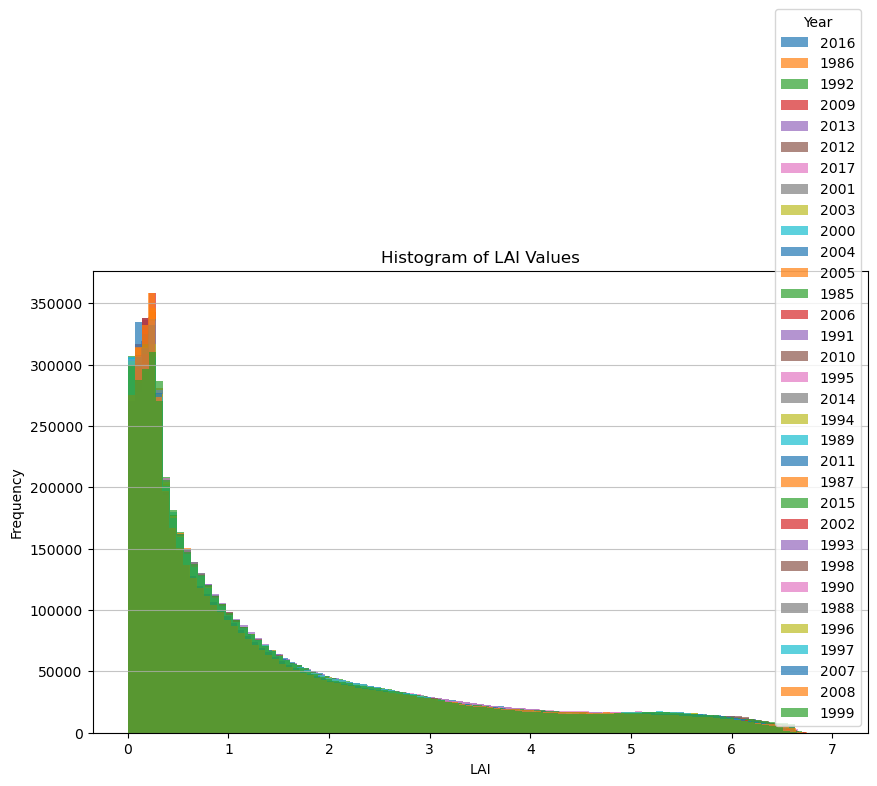

In [3]:
all_LAI = pd.DataFrame()

for filepath in glob.glob(fp):

    # get filename (year)
    year = os.path.basename(filepath).split(".")[-2]

    # for each year, append LAI values with their associated year to data frame
    lai_data = xr.open_dataset(filepath).LAI.values.flatten()
    # create temporary dataframe from lai_data
    temp_df = pd.DataFrame({"Year": year, "LAI": lai_data})
    all_LAI = pd.concat([all_LAI, temp_df], ignore_index=True)


# Create histogram of LAI values, colored by year
plt.figure(figsize=(10, 6))
for year in all_LAI['Year'].unique():
    plt.hist(all_LAI[all_LAI['Year'] == year]['LAI'], bins=100, alpha=0.7, label=str(year))
plt.legend(title='Year')
plt.title('Histogram of LAI Values')
plt.xlabel('LAI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

